In [1]:
#Importamos los datos 
import pandas as pd
import seaborn as sb
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import collections
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
import imblearn

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
 
from collections import Counter


df = pd.read_csv("datos/SDSS-DR14.csv")
df[:10]

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,STAR,0.000315,324,51666,594
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,GALAXY,0.100242,287,52023,559
7,1.237650e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.722370e+18,STAR,0.000315,3306,54922,515
8,1.237650e+18,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,3.638290e+17,STAR,0.000089,323,51615,595
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,3.243690e+17,GALAXY,0.040508,288,52000,400


## Descripción de los Parámetros

A continuación se detalla el significado de cada parámetro de las observaciones, indicando su tipo y si será utilizado posteriormente por los modelos.

<table style="float:left">
    <tr style="background:#444;color:white">
        <th>Parámetro</th>
        <th>Descripción</th>
        <th>Tipo de Variable</th>
        <th>Utilizada</th>
    </tr>
    <tr>
        <td style='font-weight:bold'>objid:</td>
        <td>Id de la tabla de la cual proviene el dataset.</td>
        <td>Discreta</td>
        <td>No</td>
    </tr>
    <tr>
        <td style='font-weight:bold'>ra:</td>
        <td>Ángulo de ascensión recta. <a href="https://en.wikipedia.org/wiki/Right_ascension">Más Info</a></td>
        <td>Continua</td>
        <td>No</td>
    </tr>
    <tr>
        <td style='font-weight:bold'>dec:</td>
        <td>Ángulo de declinación. <a href="https://en.wikipedia.org/wiki/Declination">Más Info</a></td>
        <td>Continua</td>
        <td>No</td>
    </tr>
    <tr>
        <td style='font-weight:bold'>u:</td>
        <td>Intensidad del espectro ultravioleta.</td>
        <td>Continua</td>
        <td>Si</td>
    </tr>
    <tr>
        <td style='font-weight:bold'>g:</td>
        <td>Intensidad del espectro verde.</td>
        <td>Continua</td>
        <td>Si</td>
    </tr>
    <tr>
        <td style='font-weight:bold'>r:</td>
        <td>Intensidad del espectro rojo.</td>
        <td>Continua</td>
        <td>Si</td>
    </tr>
    <tr>
        <td style='font-weight:bold'>i:</td>
        <td>Intensidad del espectro infrarojo.</td>
        <td>Continua</td>
        <td>Si</td>
    </tr>
    <tr>
        <td style='font-weight:bold'>z:</td>
        <td>Intensidad del espectro infrarojo lejano.</td>
        <td>Continua</td>
        <td>Si</td>
    </tr>
    <tr>
        <td style='font-weight:bold'>run:</td>
        <td>Largo de la tira actual (ID del escaneo). <a href="https://www.sdss.org/dr16/imaging/imaging_basics/">Más Info</a></td>
        <td>Discreta</td>
        <td>No</td>
    </tr>
    <tr>
        <td style='font-weight:bold'>rerun:</td>
        <td>Tipo de reprocesamieto del <i>"run"</i>. <a href="https://www.sdss.org/dr16/help/glossary/#rerun">Más Info</a></td>
        <td>Discreta</td>
        <td>No</td>
    </tr>
    <tr>
        <td style='font-weight:bold'>camcol:</td>
        <td>ID de una de las 6 tiras de la cámara utilizada en la captura. <a href="https://www.sdss.org/dr16/help/glossary/#camcol">Más Info</a></td>
        <td>Discreta</td>
        <td>No</td>
    </tr>
    <tr>
        <td style='font-weight:bold'>field:</td>
        <td>Fragmento o parte de la tira. <a href="https://www.sdss.org/dr16/help/glossary/#field">Más Info</a></td>
        <td>Discreta</td>
        <td>No</td>
    </tr>
    <tr>
        <td style='font-weight:bold'>specobjid:</td>
        <td>ID del objeto espectroscópico. <a href="https://www.sdss.org/dr16/help/glossary/#specobj">Más Info</a></td>
        <td>Discreta</td>
        <td>No</td>
    </tr>
    <tr>
        <td style='font-weight:bold'>class:</td>
        <td>Objeto astronómico detectado.</td>
        <td>Categórica</td>
        <td>Si</td>
    </tr>
    <tr>
        <td style='font-weight:bold'>redshift:</td>
        <td>Velocidad de recesión ( Sirve como medida de distancia a la Tierra ). <a href="https://es.qwe.wiki/wiki/Recessional_velocity">Más Info</a></td>
        <td>Continua</td>
        <td>Si</td>
    </tr>
    <tr>
        <td style='font-weight:bold'>plate:</td>
        <td>ID de la placa utilizada en la captura. <a href="https://blog.sdss.org/2014/09/19/sdss-plates/">Más Info</a></td>
        <td>Discreta</td>
        <td>No</td>
    </tr>
    <tr>
        <td style='font-weight:bold'>mjd:</td>
        <td>Fecha Juliana modificada, de la noche en que se realizó la observación. <a href="http://scienceworld.wolfram.com/astronomy/ModifiedJulianDate.html">Más Info</a></td>
        <td>Discreta</td>
        <td>No</td>
    </tr>
    <tr>
        <td style='font-weight:bold'>fiberid:</td>
        <td>Id del cable de la placa que realizó la captura.</td>
        <td>Discreta</td>
        <td>No</td>
    </tr>
</table>


Filtración de Parámetros

Los parámetros que contienen ID's, características sobre la placa utilizada o sobre la estructura de la imagen, y fechas, no aportan información relevante al problema ( objid, run, rerun, camcol, field, specobjid, plate, mjd, fiberid ).

Lo mismo ocurre con los parámetros ra y dec, los cuales indican las coordenadas espaciales de la observación.
Podría ocurrir que en ciertas coordenadas, exista una mayor concentración de objetos astronomicos de algun tipo, en cuyo caso los parámetros podrían ser de utilidad, sin embargo el enfoque del problema es detectar objetos independiente de su ubicación.



## Analizando el DataSet

In [2]:
#Verificamos si falta algunos datos
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null float64
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
class        10000 non-null object
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [4]:
#clases representadas por numeros, así estrella  0, galaxia  1, Quasar  0
df["class"].replace({'STAR':0, 'GALAXY':1, 'QSO':2}, inplace=True)

In [5]:
# Variable objetivo
Y = df["class"]

# Variables predictivas
X = df[['u','g','r','i','z','redshift']]

In [6]:
# se muestra la cantidad de galaxias, estrellas y quasares
print(collections.Counter(Y))

Counter({1: 4998, 0: 4152, 2: 850})


## Usando el modelo de regresión logistica 

In [7]:

# Dividimos dataset en testeo y entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .3, random_state=25)


In [8]:
# Entrenamos el modelo
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)


/home/felipe/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [9]:
# Analizamos su eficiencia
model.score(X_test,y_test)

0.959

In [10]:
# Calculamos la matriz de confusión para evaluar donde falla el modelo
y_predicted = model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
labels = pd.factorize(df['class'])


In [11]:
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_predicted)
cm


array([[1272,   25,    3],
       [  72, 1377,    4],
       [   0,   19,  228]])

In [12]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1300
           1       0.97      0.95      0.96      1453
           2       0.97      0.92      0.95       247

    accuracy                           0.96      3000
   macro avg       0.96      0.95      0.96      3000
weighted avg       0.96      0.96      0.96      3000



La precisión de clasificar una estrella es de un 95%, mientras que el 98% del total fué reconocido. Precisión para encontrar una galaxia 97%, mientras que el 95% del total de estos fué reconocido. Por último la probabilidad de clasificar la clase como quasar es de un 97%, siendo reconocidos el 92% del total de estos.

Ahora procedemos a realizar Oversampling sobre los datos

In [13]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(sampling_strategy='minority')
X_train_res, y_train_res = os.fit_sample(X_train, y_train)

In [14]:
#se muestra la cantidad de estrellas quasar y galaxias
print(collections.Counter(y_train_res))

Counter({2: 3545, 1: 3545, 0: 2852})


In [15]:

model = LogisticRegression()
model.fit(X_train_res,y_train_res)

# Analizamos su eficiencia
model.score(X_train_res,y_train_res)



/home/felipe/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9644940655803661

In [16]:
# Calculamos la matriz de confusión 
y_predicted = model.predict(X_test)
y_predicted


array([2, 1, 1, ..., 0, 1, 1])

In [17]:
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(y_test, y_predicted)
confusion_matrix

array([[1270,   25,    5],
       [  73, 1372,    8],
       [   0,    9,  238]])

In [18]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1300
           1       0.98      0.94      0.96      1453
           2       0.95      0.96      0.96       247

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000



### Regresión Logística con oversampling
Luego de realizar el modelo de Regresión Logistica con oversampling. Podemos notar que las eficiencias son relativamente similares, es decir, que en este caso tener las características de la muestra equilibrados, hace que la diferencia de predicción no sea mayor a un 2%.

## Ahora analizaremos el modelo predictivo OLS

In [19]:
import statsmodels.api as sm
from sklearn import datasets
Y = df["class"]
X = df[['u','g','r','i','z','redshift']]
est = sm.OLS(Y, X).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                  class   R-squared (uncentered):                   0.845
Model:                            OLS   Adj. R-squared (uncentered):              0.845
Method:                 Least Squares   F-statistic:                              9085.
Date:                Sun, 31 May 2020   Prob (F-statistic):                        0.00
Time:                        22:40:47   Log-Likelihood:                         -3992.8
No. Observations:               10000   AIC:                                      7998.
Df Residuals:                    9994   BIC:                                      8041.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [20]:
#función para la variable y, retornando a partir de la multiplicación de coeficientes
def predict_ast(u,g,r,i,z,redshift):
    return  u * -0.5886 + g * 1.1118 + r * 0.6553 + i * -0.0701 + z * -1.0762 + redshift * 0.8099

In [21]:
#ahora analizaremos los valores para las distintas clases:
#clase 0:
predict_ast(19.47406, 17.04240, 15.94699, 15.50342, 15.22531,  	-0.000009)

0.4630954978999969

Para esta predicción, comparando con los valores reales, encontramos una diferencia de 46%, ya que debería corresponder a la clase 0.

In [22]:
#clase 1:
predict_ast(19.38298, 18.19169, 17.47428, 17.08732, 16.80125, 0.123111)

1.0879758149000016

Para esta predicción, comparando con los valores reales, encontramos una diferencia de 8%, ya que debería corresponder a la clase 1.

In [23]:
#clase 2
predict_ast(18.73832, 18.60962, 18.39696, 18.31174, 17.97663, 0.271937)

1.3064678482999952

Para esta predicción, comparando con los valores reales, encontramos una diferencia de 30%, ya que debería
corresponder a la clase 2.

## Análisis del modelo OLS
Los valores que aproximan la predicción de este modelo está basado en el peso de sus variables observadas. En este caso las variables con mayor pesos son u, g, z y redshift.

### Ventajas
Es un modelo fácil de implementar y útil en predicciones con relaciones más simples.

### Desventajas

- Problemas con valores extremos.
- Función de predicción estática.
- Resultados no tan buenos.

### Ahora aplicaremos el modelo Árbol de decisión

In [32]:
#árbol de decisión
from sklearn import tree
#Entrenamiento
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_res,y_train_res)
tree.export_graphviz(clf)

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[5] <= 0.157\\ngini = 0.663\\nsamples = 9942\\nvalue = [2852, 3545, 3545]"] ;\n1 [label="X[5] <= 0.002\\ngini = 0.515\\nsamples = 6424\\nvalue = [2852, 3443, 129]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[0] <= 19.575\\ngini = 0.015\\nsamples = 2874\\nvalue = [2852, 19, 3]"] ;\n1 -> 2 ;\n3 [label="X[2] <= 14.307\\ngini = 0.013\\nsamples = 2832\\nvalue = [2813, 16, 3]"] ;\n2 -> 3 ;\n4 [label="X[2] <= 14.302\\ngini = 0.147\\nsamples = 25\\nvalue = [23, 2, 0]"] ;\n3 -> 4 ;\n5 [label="X[3] <= 14.268\\ngini = 0.08\\nsamples = 24\\nvalue = [23, 1, 0]"] ;\n4 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 21\\nvalue = [21, 0, 0]"] ;\n5 -> 6 ;\n7 [label="X[1] <= 14.384\\ngini = 0.444\\nsamples = 3\\nvalue = [2, 1, 0]"] ;\n5 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 2\\nvalue = [2, 0, 0]"] ;\n7 -> 8 ;\n9 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1, 0]"] ;\n7 -> 9 ;\n10 [label="gini = 0.0\\nsamples = 1\\nvalue = [

In [25]:
#Predicciones
y_pred = clf.predict(X_test)
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[1293    5    2]
 [   2 1435   16]
 [   0   24  223]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1300
           1       0.98      0.99      0.98      1453
           2       0.93      0.90      0.91       247

    accuracy                           0.98      3000
   macro avg       0.97      0.96      0.96      3000
weighted avg       0.98      0.98      0.98      3000



In [73]:
from io import StringIO
import pydot #sudo apt install python3-pydot graphviz

dot_data = StringIO()

features=['u','g','r','i','z','redshift']
classes=['0','1','2']
tree.export_graphviz(clf,out_file=dot_data,feature_names=features,class_names=classes, filled=True, 
                     rounded=True, impurity=False)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_png('modelo.png')

True

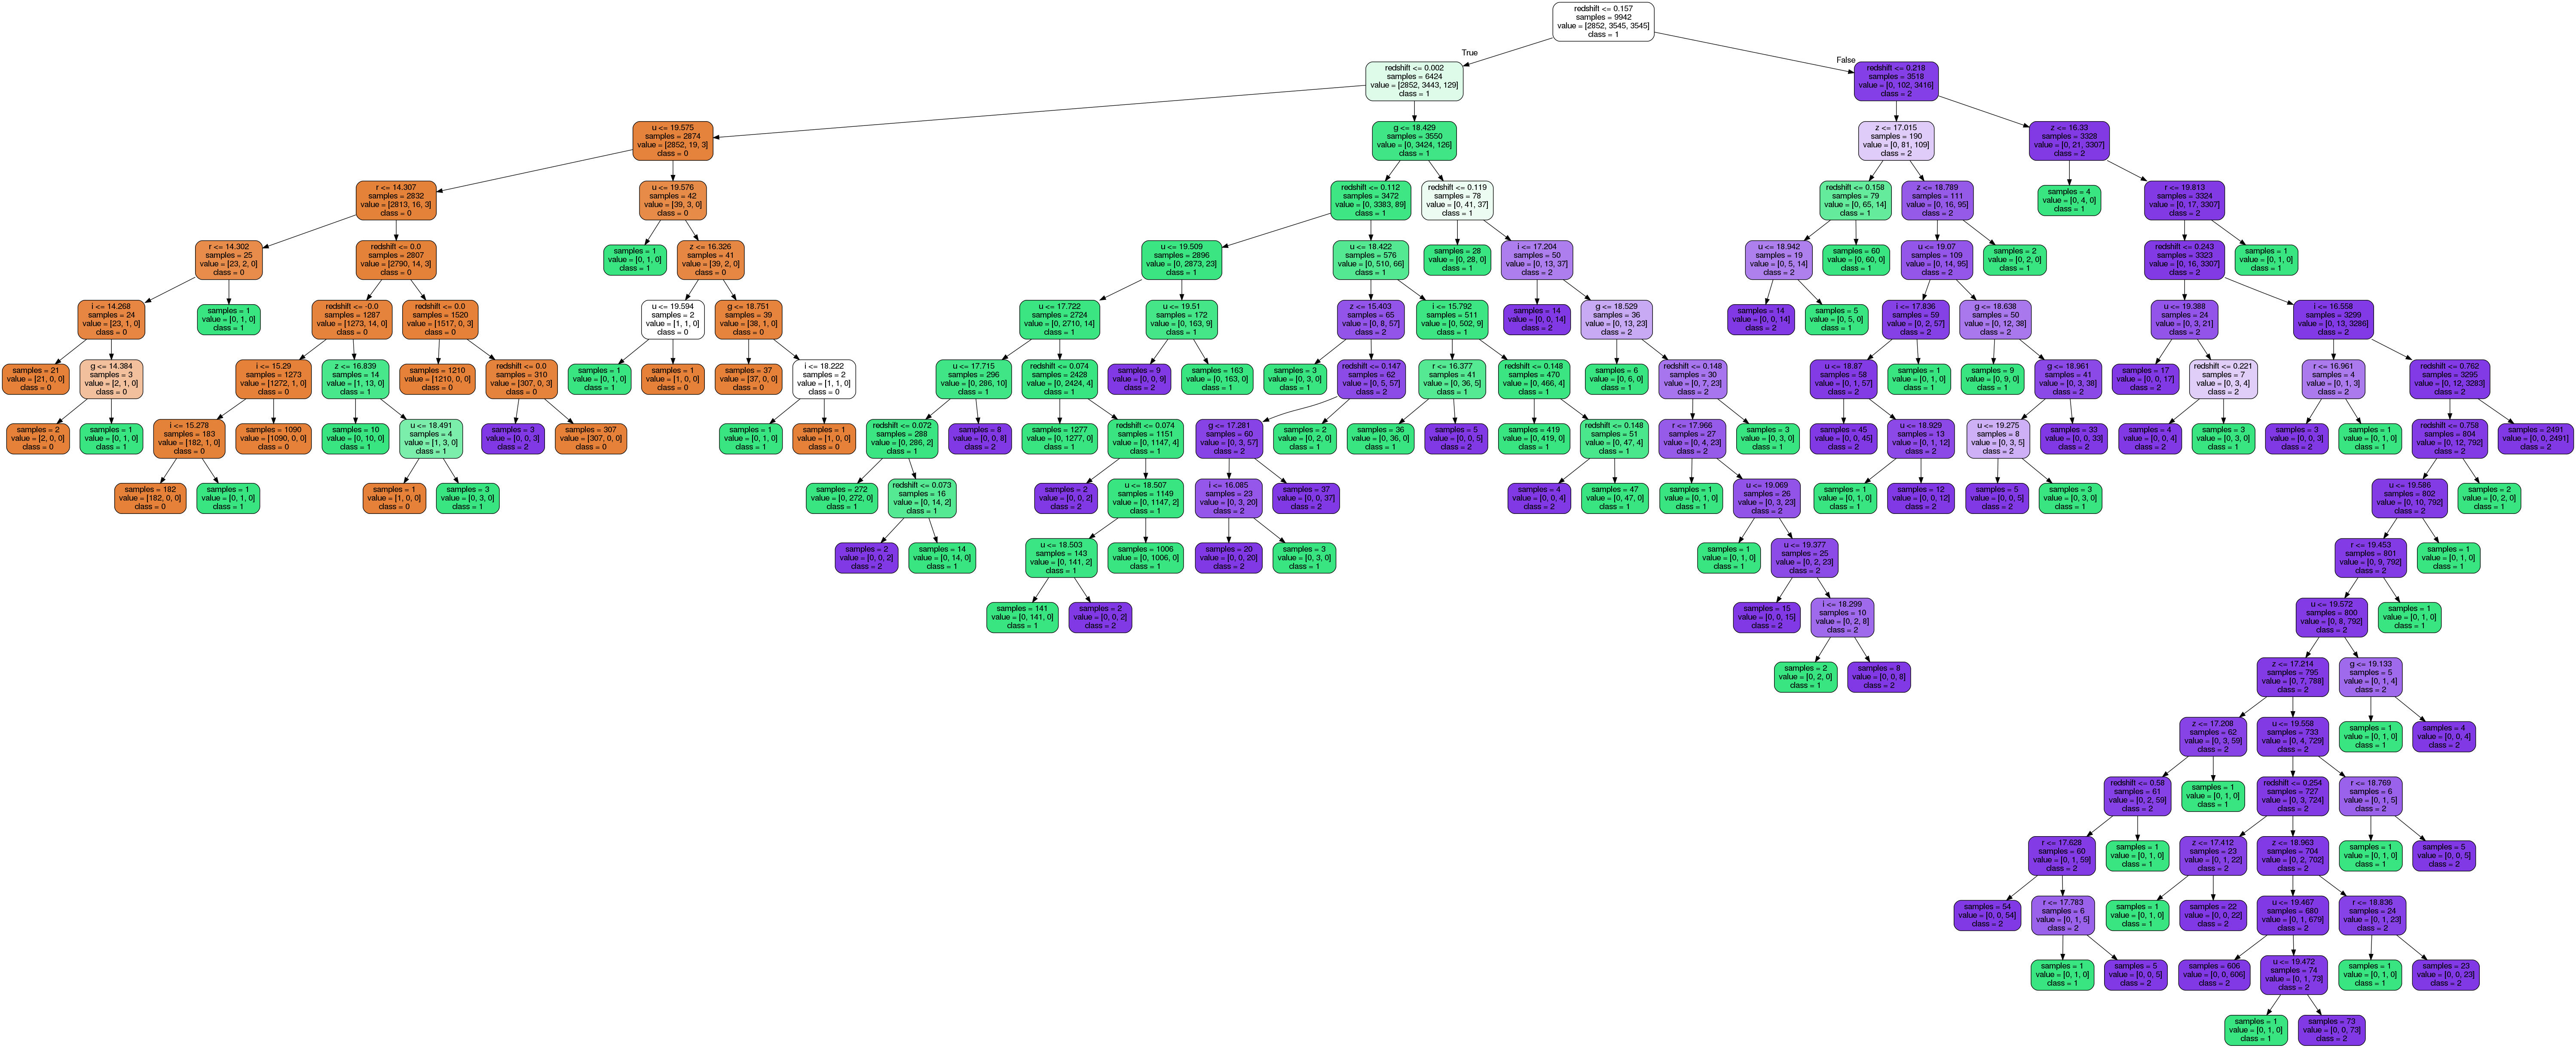

In [74]:
from IPython.display import Image
Image("modelo.png")

### Variables de Arbol de decisión
De aquí analizamos que la característica más importante es "redshift", cuando esta condición es verdadera le siguen las características "u" y "g", mientras que cuando la condición es falsa, la característica siguiente más importante está dada por "z"

## Conclusiones
El modelo de predicción árbol de decisión finalmente es el más preciso respecto a la precisión en las estrellas y galaxias, siendo superado solo por el método de regresión lineal respecto a los quasares.